
```
# This is formatted as code
```
# **Name: Sharjeel Akram**
# **Roll Number: BSCS_2019_60**
# **Assignment: DAV Assignment 02**

In [3]:
import pandas as pd  
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log  
res = adfuller(df.Temp.dropna())  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: -4.444805
p-value: 0.000247


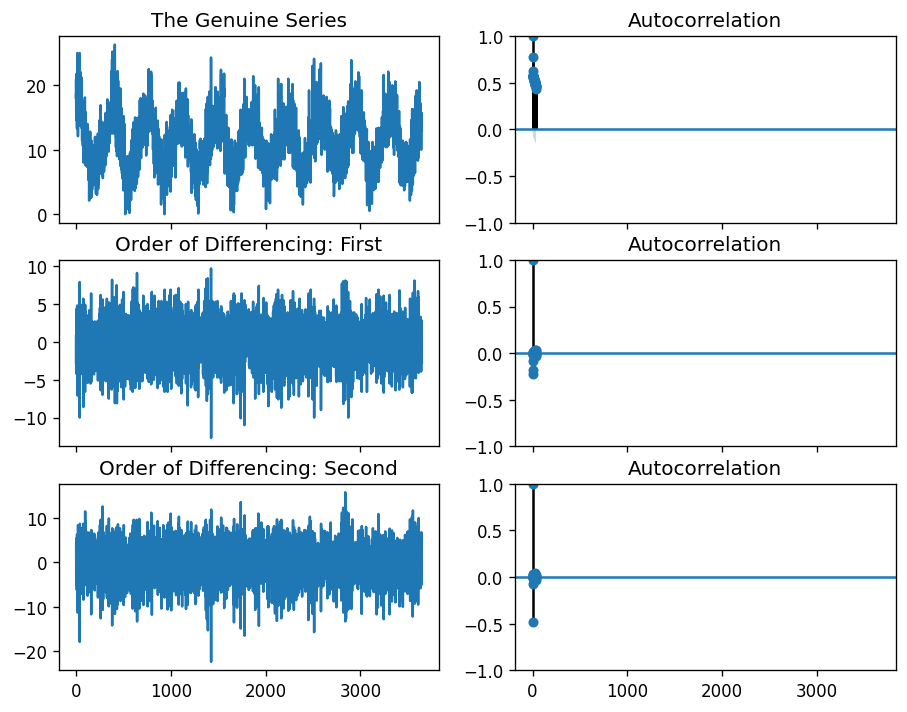

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  
plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' : 120})  
 # The Genuine Series  
fig, axes = plt.subplots(3, 2, sharex = True)  
axes[0, 0].plot(df.Temp); axes[0, 0].set_title('The Genuine Series')  
plot_acf(df.Temp, ax = axes[0, 1])  
# Order of Differencing: First  
axes[1, 0].plot(df.Temp.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(df.Temp.diff().dropna(), ax = axes[1, 1])   
# Order of Differencing: Second  
axes[2, 0].plot(df.Temp.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(df.Temp.diff().diff().dropna(), ax = axes[2, 1])  
plt.show()

In [6]:
!pip install pmdarima

In [7]:
from pmdarima.arima.utils import ndiffs  
X = df.Temp  
# Augmented Dickey Fuller Test  
adftest = ndiffs(X, test = 'adf')  
# KPSS Test  
kpsstest = ndiffs(X, test = 'kpss')    
# PP Test  
pptest = ndiffs(X, test = 'pp')   
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest) 

ADF Test = 0
KPSS Test = 0
PP Test = 0


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


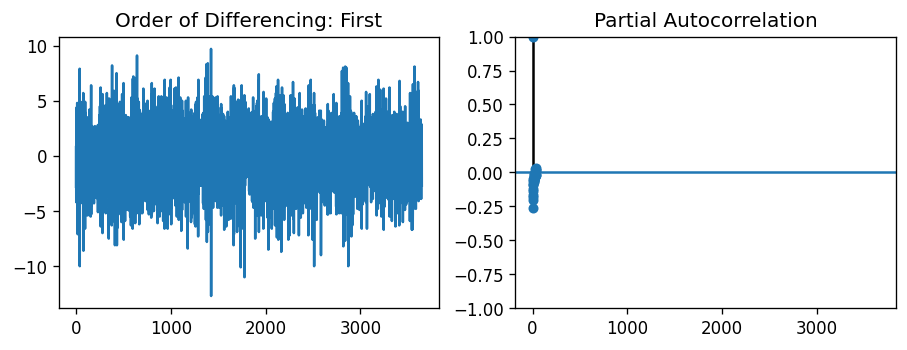

In [8]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df.Temp.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0,5))  
plot_pacf(df.Temp.diff().dropna(), ax = axes[1])  
plt.show()  

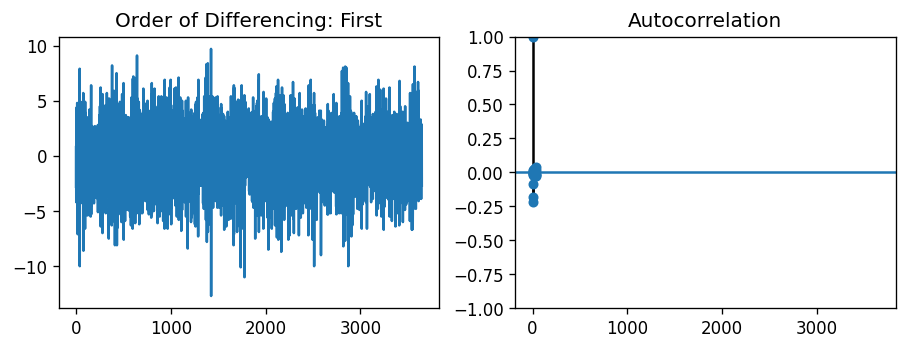

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})      
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df.Temp.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(df.Temp.diff().dropna(), ax = axes[1])  
plt.show()  

In [10]:
from statsmodels.tsa.arima.model import ARIMA       
# Creating ARIMA model  
mymodel = ARIMA(df.Temp, order = (1, 1, 2))  
modelfit = mymodel.fit()  
print(modelfit.summary())  

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8387.922
Date:                Fri, 01 Apr 2022   AIC                          16783.843
Time:                        17:49:10   BIC                          16808.652
Sample:                             0   HQIC                         16792.678
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2490      0.039      6.422      0.000       0.173       0.325
ma.L1         -0.6546      0.039    -16.775      0.000      -0.731      -0.578
ma.L2         -0.2300      0.031     -7.365      0.0

In [11]:
from statsmodels.tsa.arima.model import ARIMA     
# Creating ARIMA model  
mymodel = ARIMA(df.Temp, order = (1, 1, 1))  
modelfit = mymodel.fit()  
print(modelfit.summary())  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8413.583
Date:                Fri, 01 Apr 2022   AIC                          16833.165
Time:                        17:49:11   BIC                          16851.772
Sample:                             0   HQIC                         16839.792
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4630      0.017     26.538      0.000       0.429       0.497
ma.L1         -0.9204      0.008   -111.103      0.000      -0.937      -0.904
sigma2         5.8902      0.129     45.766      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


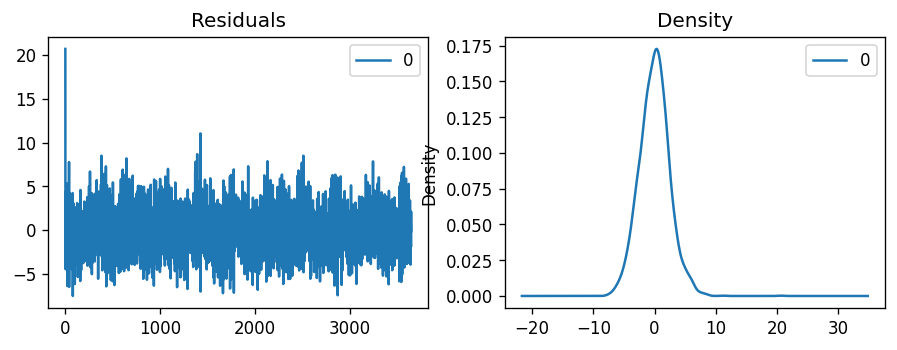

In [12]:
from statsmodels.tsa.arima.model import ARIMA  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
# Creating ARIMA model  
mymodel = ARIMA(df.Temp, order = (1, 1, 1))  
modelfit = mymodel.fit()  
# Plotting Residual Errors  
myresiduals = pd.DataFrame(modelfit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

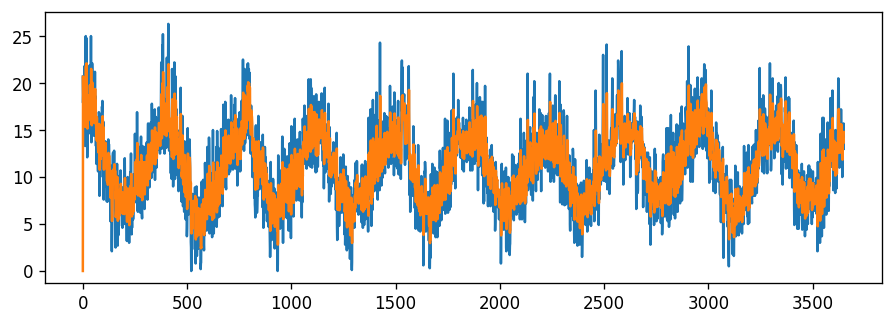

In [13]:
from statsmodels.tsa.arima.model import ARIMA    
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})   
p = modelfit.predict(dynamic=False) 
df['Temp'].plot()
p.plot()
plt.show()  